In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bc import *
from hll import *
from hydro_adi_riemann import *
from hydro_adi_classic import *

# 1.1. A numerical solution to a Riemann problem

The problem we want to solve is defined as $\rho_L = 10^5$, $\rho_R = 1.24\times10^4$, $p_L = 1$, $p_R = 0.1$ and $u_L = u_R = 0$. \
Use the adiabatic (not the isothermal) versions of the solvers. Use 200 grid points between -100 and +100, and integrate until t = 5000.

## 1. Solve this problem and plot the results for $\rho(x)$, u(x), and p(x) at the final time (t = 5000).

In [2]:
# Define function for CFL condition
def CFL(dx, q):
    v_max = max(abs(q[1]/q[0]))
    return dx / v_max

# Define function for classic adiabatic integrator
def classic_adi_integrator(q_0, dx, dt, T):
    
    steps = int(T/dt) + 1
    q = np.zeros(( [steps+1, q_0.shape[0], q_0.shape[1]] ))
    
    # set initial conditions
    q[0] = q_0
    
    # loop over timesteps
    for i in range(steps):
        q[i+1] = hydro_adi_classic_one_timestep(q[i],dx,dt)
        
        # implement periodic boundary conditions
        implement_boundcond(q[i+1],bctype='fixed')
        
        # check CFL condition
        if not ( dt < CFL(dx, q[i+1]) ):
            print('CFL timestep condition not satisfied at timestep %i' %(i+1) )
        
    return q

# Define function for Riemann adiabatic integrator
def riemann_adi_integrator(q_0, dx, dt, T):
    
    steps = int(T/dt) + 1
    q = np.zeros(( [steps+1, q_0.shape[0], q_0.shape[1]] ))
    
    # set initial conditions
    q[0] = q_0
    
    # loop over timesteps
    for i in range(steps):
        q[i+1] = hydro_adi_riemann_one_timestep(q[i],dx,dt)
        
        # implement periodic boundary conditions
        implement_boundcond(q[i+1],bctype='fixed')
        
        # check CFL condition
        if not ( dt < CFL(dx, q[i+1]) ):
            print('CFL timestep condition not satisfied at timestep %i' %(i+1) )
        
    return q  

# Define function that gives rho, P, u values given a q
def convert(q):
    gamma = 7./5.              # adiabatic factor
    rho = q[:,0,:]             # density
    v = q[:,1,:]/rho           #velocity
    p = (gamma - 1)*(q[:,2,:]-(0.5*rho*v**2))
    
    return rho, v, p

In [15]:
# Define initial conditions and parameters

gamma = 7./5   # adiabatic constant

N = 200  # number of grid points
xmin, xmax = -100., 100.
dx = (xmax-xmin)/N
x = np.arange(xmin, xmax, dx) + dx/2   # take cells centers

T = 5000   # final integration time
Dt = 1.

indpos = np.where(x>0)[0]
indneg = np.where(x<0)[0]

# Initial rho
rho0 = np.zeros((len(x)))
rho0[indneg] = 10**5
rho0[indpos] = 1.24*10**4

# Initial v
v0 = np.zeros((len(x)))

# Initial p 
p0 = np.zeros((len(x)))
p0[indneg] = 1.
p0[indpos] = 0.1

q0 = np.array(( [rho0, rho0*v0, p0/(gamma-1)] ))

In [16]:
# Perform simulation 

q_classic = classic_adi_integrator(q0, dx, Dt, T)
q_riemann = riemann_adi_integrator(q0, dx, Dt, T)

# convert quantities
rho_cl, v_cl, p_cl = convert(q_classic)
rho_ri, v_ri, p_ri = convert(q_riemann)

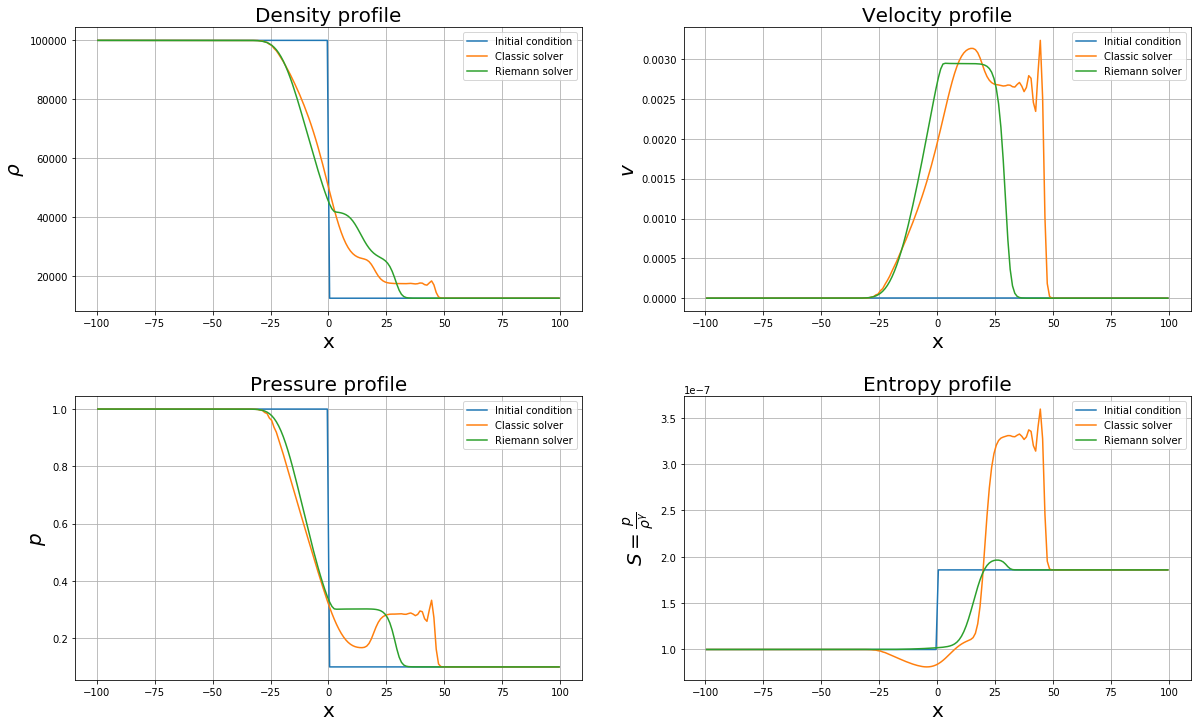

In [17]:
# Plot results

fig = plt.subplots(figsize=[20,12])
#plt.suptitle('Density profile', fontsize = 20)

plt.subplot(2,2,1)
plt.plot(x, rho0, label = 'Initial condition')
plt.plot(x, rho_cl[-1], label = 'Classic solver')
plt.plot(x, rho_ri[-1], label = 'Riemann solver')
plt.title('Density profile', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel(r'$\rho$', fontsize = 20)
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.plot(x, v0, label = 'Initial condition')
plt.plot(x, v_cl[-1], label = 'Classic solver')
plt.plot(x, v_ri[-1], label = 'Riemann solver')
plt.title('Velocity profile', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('$v$', fontsize = 20)
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.plot(x, p0, label = 'Initial condition')
plt.plot(x, p_cl[-1], label = 'Classic solver')
plt.plot(x, p_ri[-1], label = 'Riemann solver')
plt.title('Pressure profile', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('$p$', fontsize = 20)
plt.legend()
plt.grid()

plt.subplot(2,2,4)
plt.plot(x, p0/rho0**gamma, label = 'Initial condition')
plt.plot(x, p_cl[-1]/rho_cl[-1]**gamma, label = 'Classic solver')
plt.plot(x, p_ri[-1]/rho_ri[-1]**gamma, label = 'Riemann solver')
plt.title('Entropy profile', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel(r'$S = \frac{p}{\rho^\gamma}$', fontsize = 20)
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=.3)

plt.show(fig)

## 2. Compare the results between the classic and the HLL Riemann solver.

Comment ......

## 3. Redo the problem with 10x higher spatial resolution.

In [20]:
N = 2000  # number of grid points
dx = (xmax-xmin)/N
x = np.arange(xmin, xmax, dx) + dx/2   # take cells centers

indpos = np.where(x>0)[0]
indneg = np.where(x<0)[0]

# Initial rho
rho0 = np.zeros((len(x)))
rho0[indneg] = 10**5
rho0[indpos] = 1.24*10**4

# Initial v
v0 = np.zeros((len(x)))

# Initial p 
p0 = np.zeros((len(x)))
p0[indneg] = 1.
p0[indpos] = 0.1

q0 = np.array(( [rho0, rho0*v0, p0/(gamma-1)] ))

# Perform simulation 
q_classic = classic_adi_integrator(q0, dx, Dt, T)
q_riemann = riemann_adi_integrator(q0, dx, Dt, T)

# convert quantities
rho_cl, v_cl, p_cl = convert(q_classic)
rho_ri, v_ri, p_ri = convert(q_riemann)

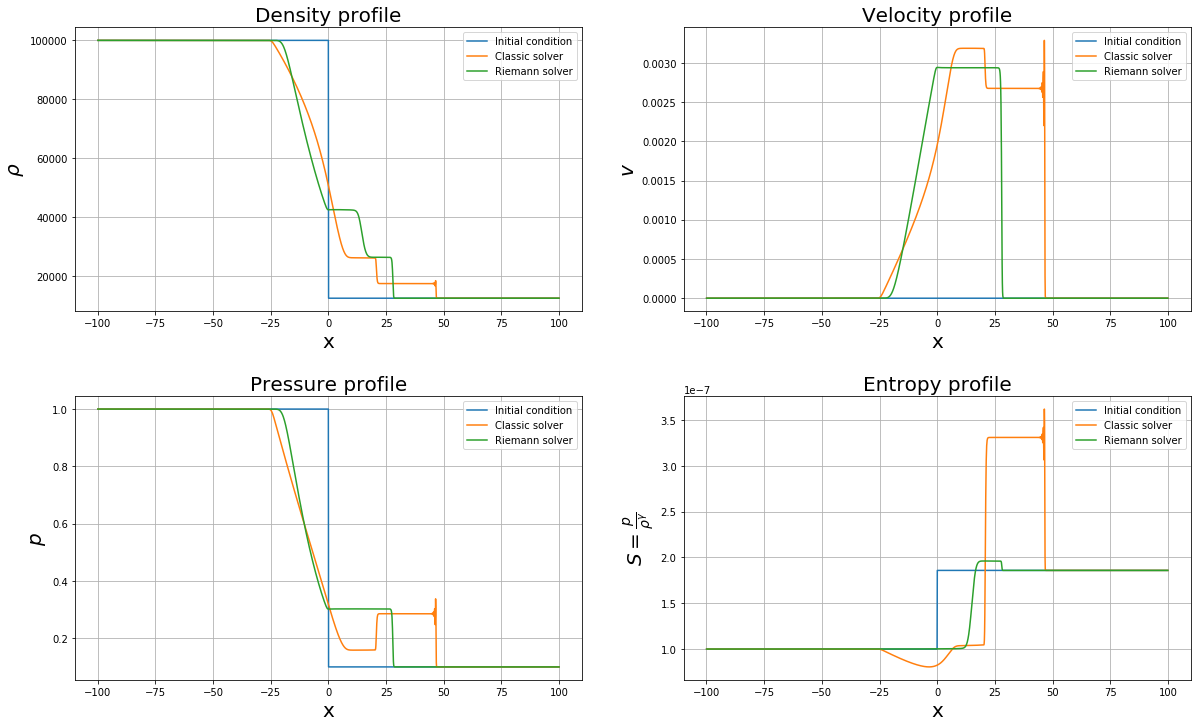

In [21]:
fig1 = plt.subplots(figsize=[20,12])
#plt.suptitle('Density profile', fontsize = 20)

plt.subplot(2,2,1)
plt.plot(x, rho0, label = 'Initial condition')
plt.plot(x, rho_cl[-1], label = 'Classic solver')
plt.plot(x, rho_ri[-1], label = 'Riemann solver')
plt.title('Density profile', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel(r'$\rho$', fontsize = 20)
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.plot(x, v0, label = 'Initial condition')
plt.plot(x, v_cl[-1], label = 'Classic solver')
plt.plot(x, v_ri[-1], label = 'Riemann solver')
plt.title('Velocity profile', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('$v$', fontsize = 20)
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.plot(x, p0, label = 'Initial condition')
plt.plot(x, p_cl[-1], label = 'Classic solver')
plt.plot(x, p_ri[-1], label = 'Riemann solver')
plt.title('Pressure profile', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('$p$', fontsize = 20)
plt.legend()
plt.grid()

plt.subplot(2,2,4)
plt.plot(x, p0/rho0**gamma, label = 'Initial condition')
plt.plot(x, p_cl[-1]/rho_cl[-1]**gamma, label = 'Classic solver')
plt.plot(x, p_ri[-1]/rho_ri[-1]**gamma, label = 'Riemann solver')
plt.title('Entropy profile', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel(r'$S = \frac{p}{\rho^\gamma}$', fontsize = 20)
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=.3)

plt.show(fig1)

Comment ......

## 4. Explain the shape of the solution: where is the contact discontinuity, where is the expansion wave, and where is the shock wave?

Comment... 